<a href="https://colab.research.google.com/github/Strugoeden121/ATAM1/blob/main/Major_HW1_314884602_324490135.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pylab
params = {'xtick.labelsize': 18,
 'ytick.labelsize': 18,
 'axes.titlesize' : 22,
 'axes.labelsize' : 20,
 'legend.fontsize': 18,
 'legend.title_fontsize': 22,
 'figure.titlesize': 24 }
pylab.rcParams.update(params)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#from plot3d import plot3d

In [ ]:
virus_data = pd.read_csv('virus_data.csv', header=0)

In [ ]:
virus_data.shape



(1250, 26)

In [ ]:
virus_data['conversations_per_day'].value_counts()

3     224
2     215
4     190
5     156
6     111
1     104
8      72
7      60
9      39
10     23
11     19
12     12
13      9
14      6
17      4
15      2
16      2
19      1
22      1
Name: conversations_per_day, dtype: int64

In [ ]:
virus_data_train, virus_data_test = train_test_split(virus_data, test_size=0.2, random_state=37)

In [ ]:
csv_file_path = 'output.csv'
virus_data_train.to_csv(csv_file_path, index=False)

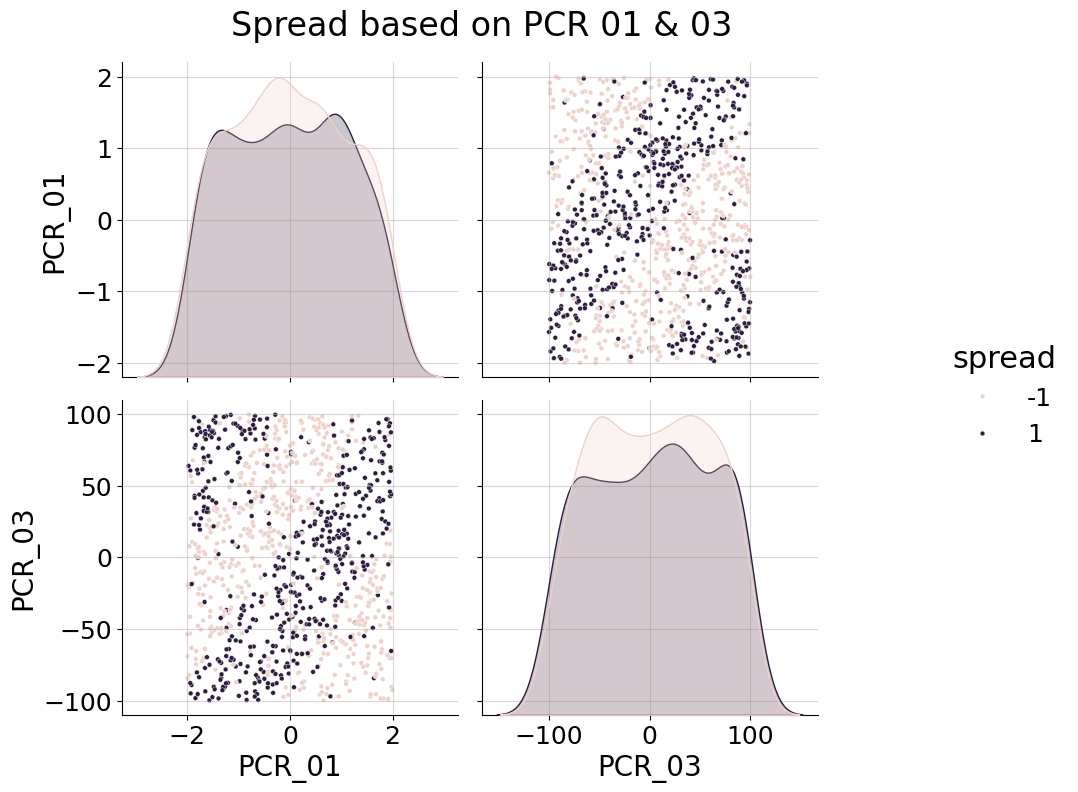

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

virus_data_training = pd.read_csv("output.csv")
g=sns.pairplot(virus_data_training, hue="spread", plot_kws={"s": 12},
               x_vars=["PCR_01", "PCR_03"], y_vars=["PCR_01", "PCR_03"])
g.fig.suptitle("Spread based on PCR 01 & 03", y=1.04)
for ax in np.ravel(g.axes):
    ax.grid(alpha=0.5)

g.fig.set_size_inches(12,8)

plt.savefig('pairplot.png')

plt.show()




In [ ]:
from sklearn.base import BaseEstimator,ClassifierMixin
from scipy.spatial.distance import cdist
class kNN(BaseEstimator, ClassifierMixin):
 def __init__(self, n_neighbors:int = 3):
  self.n_neighbors = n_neighbors
  self.X_train = None
  self.Y_train = None

 def fit(self, X, y):
    self.X_train = np.array(X)
    self.Y_train = np.array(y)
    return self

 def predict(self, X):
  distances = cdist(X, self.X_train)


  nearest_neighbors = np.argpartition(distances, self.n_neighbors, axis = 1)[:,:self.n_neighbors]
  nearest_labels = self.Y_train[nearest_neighbors]


  predictions = np.sign(np.sum(nearest_labels, axis=1))


  return predictions

In [ ]:
X_train = np.array(virus_data_training[["PCR_01","PCR_03"]])
Y_train = np.array(virus_data_training[["spread"]])
X_test = np.array(virus_data_test[["PCR_01","PCR_03"]])
Y_test = np.array(virus_data_test[["spread"]])
knn1 = kNN(1)
knn1.fit(X_train, Y_train)




kNN(n_neighbors=1)

In [ ]:
def visualize_clf(clf, X, Y, title,
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap

    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()

    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1,1]):
      Y = (Y + 1) // 2
      labels = set(Y)

    assert labels == set([0,1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()

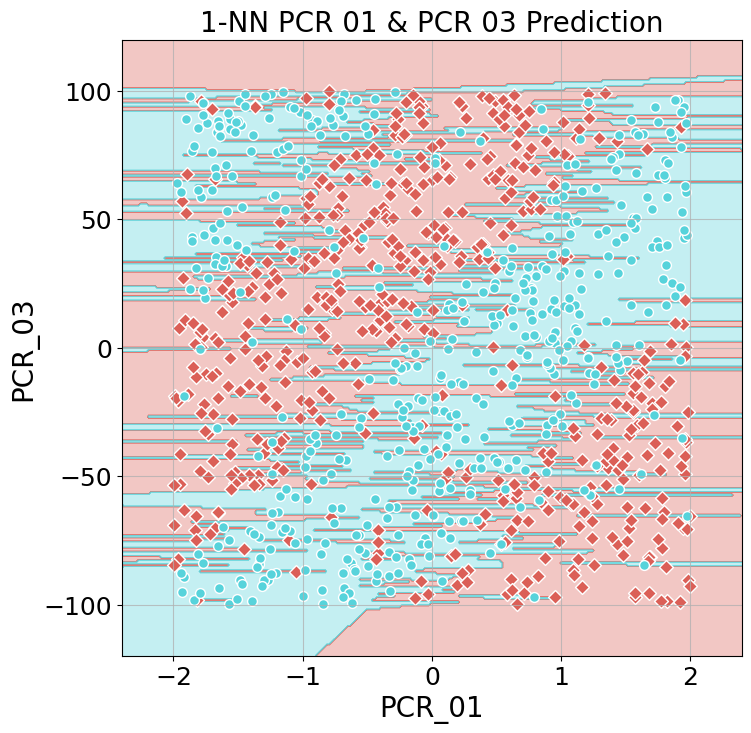

In [ ]:
visualize_clf(knn1, X_train, Y_train, "1-NN PCR 01 & PCR 03 Prediction", "PCR_01", "PCR_03")

In [ ]:
Y_pred = knn1.predict(X_test)
knn1.score(X_test, Y_test)

0.7

In [ ]:
from sklearn.preprocessing import MinMaxScaler

1.0
0.776


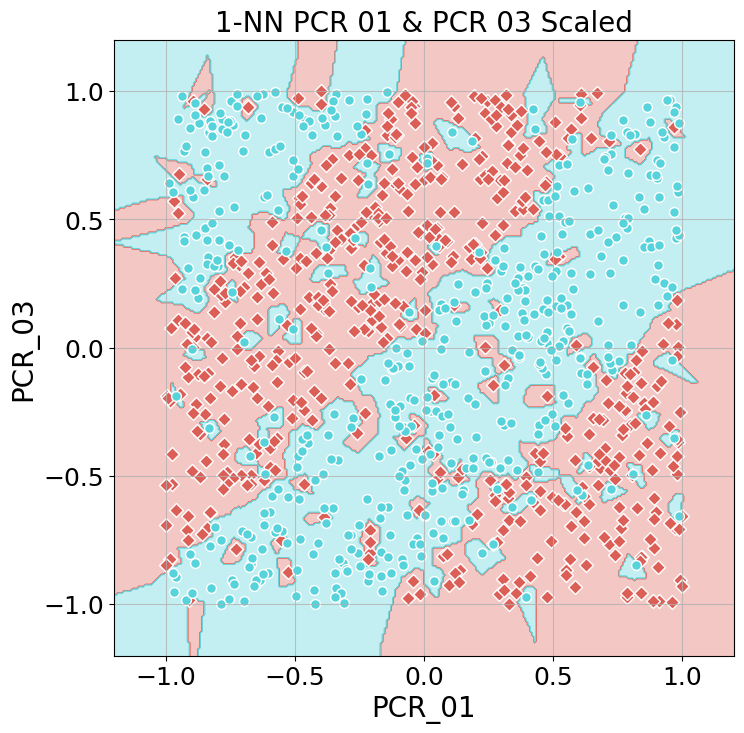

In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
knn1 = kNN(1)
knn1.fit(X_train_scaled, Y_train)
Y_pred = knn1.predict(X_test_scaled)
print(knn1.score(X_train_scaled, Y_train))
print(knn1.score(X_test_scaled, Y_test))
visualize_clf(knn1, X_train_scaled, Y_train, "1-NN PCR 01 & PCR 03 Scaled", "PCR_01", "PCR_03")

0.884
0.844


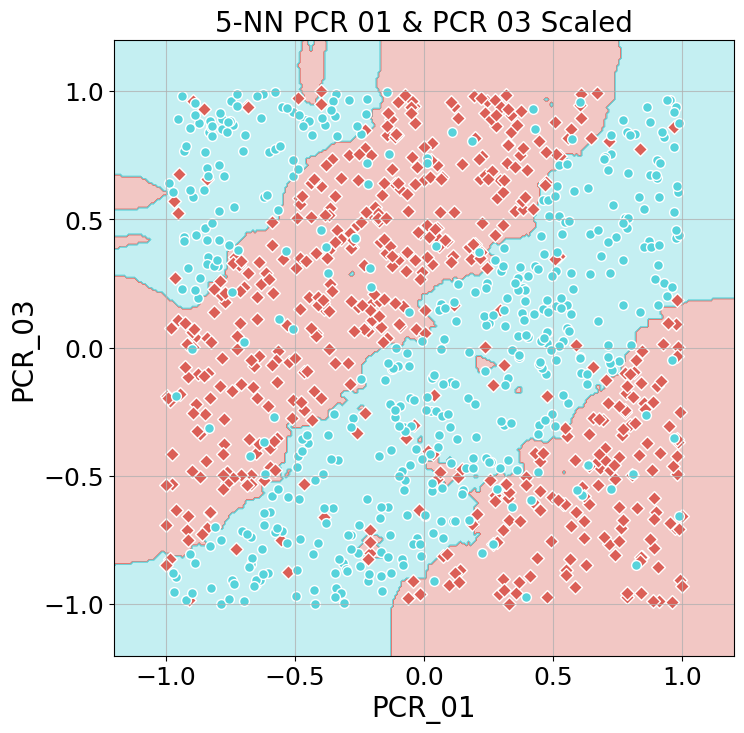

In [ ]:
knn5 = kNN(5)
knn5.fit(X_train_scaled, Y_train)
Y_pred = knn5.predict(X_test_scaled)
print(knn5.score(X_train_scaled, Y_train))
print(knn5.score(X_test_scaled, Y_test))
visualize_clf(knn5, X_train_scaled, Y_train, "5-NN PCR 01 & PCR 03 Scaled", "PCR_01", "PCR_03")

In [ ]:
virus_data_training['SpecialProperty'] = virus_data_training['blood_type'].isin(['O+', 'B+'])
virus_data_training.drop('blood_type', axis=1, inplace=True)

In [ ]:
virus_data_training['symptoms'].value_counts()

sore_throat                                               215
cough;shortness_of_breath                                  76
cough;shortness_of_breath;sore_throat                      55
fever                                                      49
sore_throat;fever                                          40
smell_loss                                                 35
smell_loss;sore_throat                                     30
shortness_of_breath                                        22
shortness_of_breath;sore_throat                            14
cough;shortness_of_breath;fever                            14
cough;smell_loss;shortness_of_breath                       11
smell_loss;fever                                            9
cough;smell_loss;shortness_of_breath;sore_throat            9
cough;shortness_of_breath;sore_throat;fever                 9
smell_loss;sore_throat;fever                                4
smell_loss;shortness_of_breath                              2
cough;sm

In [ ]:
virus_data_training['sore_throat'] = virus_data_training['symptoms'].apply(lambda x: 'sore_throat' in x.split(';')  if pd.notna(x) else False)
virus_data_training['cough'] = virus_data_training['symptoms'].apply(lambda x: 'cough' in x.split(';')  if pd.notna(x) else False)
virus_data_training['shortness_of_breath'] = virus_data_training['symptoms'].apply(lambda x: 'shortness_of_breath' in x.split(';')  if pd.notna(x) else False)
virus_data_training['fever'] = virus_data_training['symptoms'].apply(lambda x: 'fever' in x.split(';')  if pd.notna(x) else False)
virus_data_training['smell_loss'] = virus_data_training['symptoms'].apply(lambda x: 'smell_loss' in x.split(';')  if pd.notna(x) else False)
virus_data_training


patient_id  age sex  weight           current_location  num_of_siblings  \
0            23    8   F    25.0   ('21.34222', '71.30633')                1   
1           963   16   F    35.6   ('33.92866', '-6.90656')                1   
2           631   38   F    65.4   ('-4.06667', '37.73333')                1   
3           171   14   M    52.9  ('32.54278', '111.50861')                0   
4           741   30   F    48.6    ('48.28259', '9.72749')                1   
..          ...  ...  ..     ...                        ...              ...   
995         558   29   F    61.7      ('-1.6', '103.61667')                0   
996        1813   32   F    50.6   ('45.99194', '29.41824')                2   
997        1007   28   M    78.2   ('25.87498', '86.59611')                2   
998         463    9   M    54.0   ('18.18158', '76.03889')                2   
999        1251   20   M    77.0  ('36.75965', '137.36215')                1   

     happiness_score  household_income  conversations_per_day  sugar_levels  \
0                  4                 1                      4            73   
1                  6                 2                      1            79   
2                  8                 1                      4            99   
3                  6                 2                      4            88   
4                  9                 1                      3            92   
..               ...               ...                    ...           ...   
995                6                 4                      3            88   
996               10                 2                      5            97   
997                9                 1                     11           119   
998                8                 1                      2            76   
999                9                 0                      3            95   

     ...    PCR_09     PCR_10 spread  risk  SpecialProperty  sore_throat  \
0    ...  5.120102  -0.123372      1    -1            False         True   
1    ... -6.381396  -4.795775     -1    -1            False         True   
2    ... -1.618645   4.662969     -1     1            False        False   
3    ... -5.405456  -4.164492      1    -1            False        False   
4    ...  8.224237   6.893990      1     1             True         True   
..   ...       ...        ...    ...   ...              ...          ...   
995  ... -0.825709  -6.011502      1    -1            False        False   
996  ... -9.369564  -4.419843     -1    -1            False         True   
997  ... -0.372271  -8.530557      1    -1             True         True   
998  ... -8.039462  -1.053693     -1     1            False         True   
999  ...  0.093948 -16.109182      1    -1            False        False   

     cough  shortness_of_breath  fever  smell_loss  
0     True                 True  False       False  
1    False                False  False       False  
2    False                False  False       False  
3    False                False  False       False  
4    False                False  False       False  
..     ...                  ...    ...         ...  
995  False                False  False       False  
996  False                False   True        True  
997  False                False  False       False  
998  False                False  False        True  
999  False                False   True       False  

[1000 rows x 31 columns]

In [ ]:
virus_data_training['is_male'] = virus_data_training['sex'].isin(['M'])

In [ ]:
virus_data_training['x-location'] = virus_data_training['current_location'].apply(lambda x: float(x.replace("(", "").replace(")", "").replace("'", "").split(", ")[0]))
virus_data_training['y-location'] = virus_data_training['current_location'].apply(lambda x: float(x.replace("(", "").replace(")", "").replace("'", "").split(", ")[1]))
virus_data_training['num_pcr_date'] = virus_data_training['pcr_date'].apply(lambda x: float(x.replace("-", "")))


In [ ]:
virus_data_training.drop('current_location', axis=1, inplace=True)
virus_data_training.drop('sex', axis=1, inplace=True)
virus_data_training.drop('symptoms', axis=1, inplace=True)

In [ ]:
virus_data_training.drop('pcr_date', axis=1, inplace=True)

In [ ]:
virus_data_training.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             1000 non-null   int64  
 1   age                    1000 non-null   int64  
 2   weight                 1000 non-null   float64
 3   num_of_siblings        1000 non-null   int64  
 4   happiness_score        1000 non-null   int64  
 5   household_income       1000 non-null   int64  
 6   conversations_per_day  1000 non-null   int64  
 7   sugar_levels           1000 non-null   int64  
 8   sport_activity         1000 non-null   int64  
 9   PCR_01                 1000 non-null   float64
 10  PCR_02                 1000 non-null   float64
 11  PCR_03                 1000 non-null   float64
 12  PCR_04                 1000 non-null   float64
 13  PCR_05                 1000 non-null   float64
 14  PCR_06                 1000 non-null   float64
 15  PCR_0

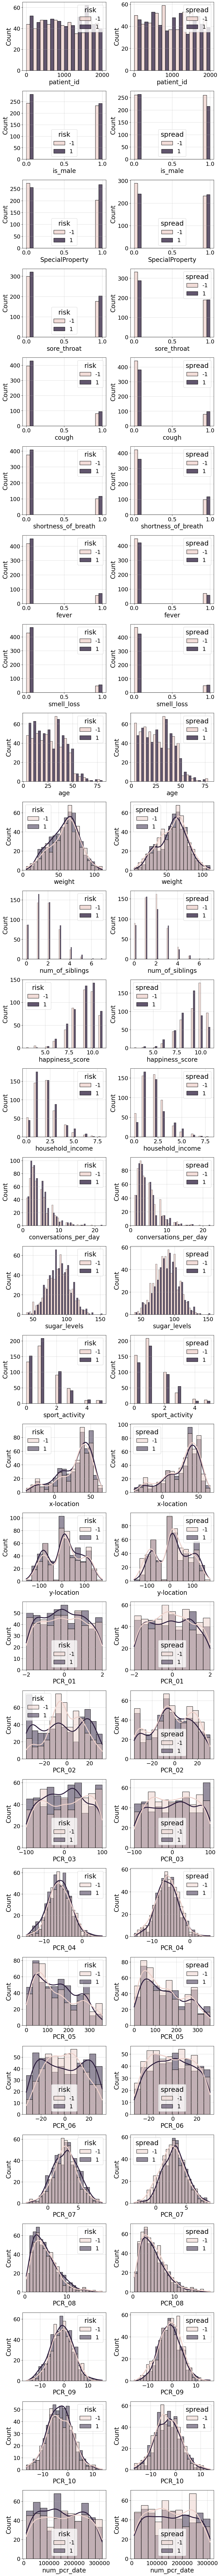

In [ ]:
COL_NAME = ['patient_id', 'is_male', 'SpecialProperty', 'sore_throat', 'cough', 'shortness_of_breath', 'fever', 'smell_loss','age', 'weight', 'num_of_siblings', 'happiness_score', 'household_income', 'conversations_per_day', 'sugar_levels', 'sport_activity' ,'x-location', 'y-location', 'PCR_01','PCR_02','PCR_03','PCR_04','PCR_05','PCR_06','PCR_07','PCR_08','PCR_09','PCR_10','num_pcr_date']
COLS, ROWS = (2, len(COL_NAME))
plt.figure(figsize=(5 * COLS, 4 * ROWS))
for row in range(ROWS):
 column = COL_NAME[row]
 for j, cls in enumerate(["risk", "spread"]):
  plt.subplot(ROWS,COLS, row * COLS + 1 + j)

  isContinuous = "float" in virus_data_training[column].dtype.name
  sns.histplot(data=virus_data_training, x=column, hue=cls, line_kws={"linewidth": 3},
  kde=isContinuous, multiple="layer" if isContinuous else "dodge")
  plt.grid(alpha=0.5)
plt.tight_layout()

In [ ]:
print(virus_data_training.shape)
for column in virus_data_training.columns:
  print(column)
  print(virus_data_training['risk'].corr(virus_data_training[column]))


(1000, 31)
patient_id
0.004099026206987436
age
-0.02904158486710027
weight
-0.030516691616006265
num_of_siblings
0.031153955656629772
happiness_score
0.01322215499553093
household_income
0.019063729219701245
conversations_per_day
-0.03449180682239479
sugar_levels
-0.004931923089838734
sport_activity
-0.027339597667421358
PCR_01
-0.006079803431215793
PCR_02
-0.06551480656587609
PCR_03
-0.029918200681558257
PCR_04
-0.03756706030843859
PCR_05
0.00933298243189284
PCR_06
-0.0039056332955816264
PCR_07
0.020026767206962285
PCR_08
-0.007318317340815646
PCR_09
-0.033279954555385995
PCR_10
-0.0013206924714804715
spread
0.016048643527099407
risk
1.0
SpecialProperty
0.08713724750343649
sore_throat
0.016005710694141854
cough
0.014595883966414938
shortness_of_breath
0.011133577728940991
fever
0.020333704080213115
smell_loss
0.009865248785444421
is_male
-0.027666454957983352
x-location
0.001135149198412256
y-location
-0.03630352201562671
num_pcr_date
-0.032594479771860904


In [ ]:
true_virus_data = virus_data_training[(virus_data_training['SpecialProperty'] == True)]
false_virus_data = virus_data_training[(virus_data_training['SpecialProperty'] == False)]


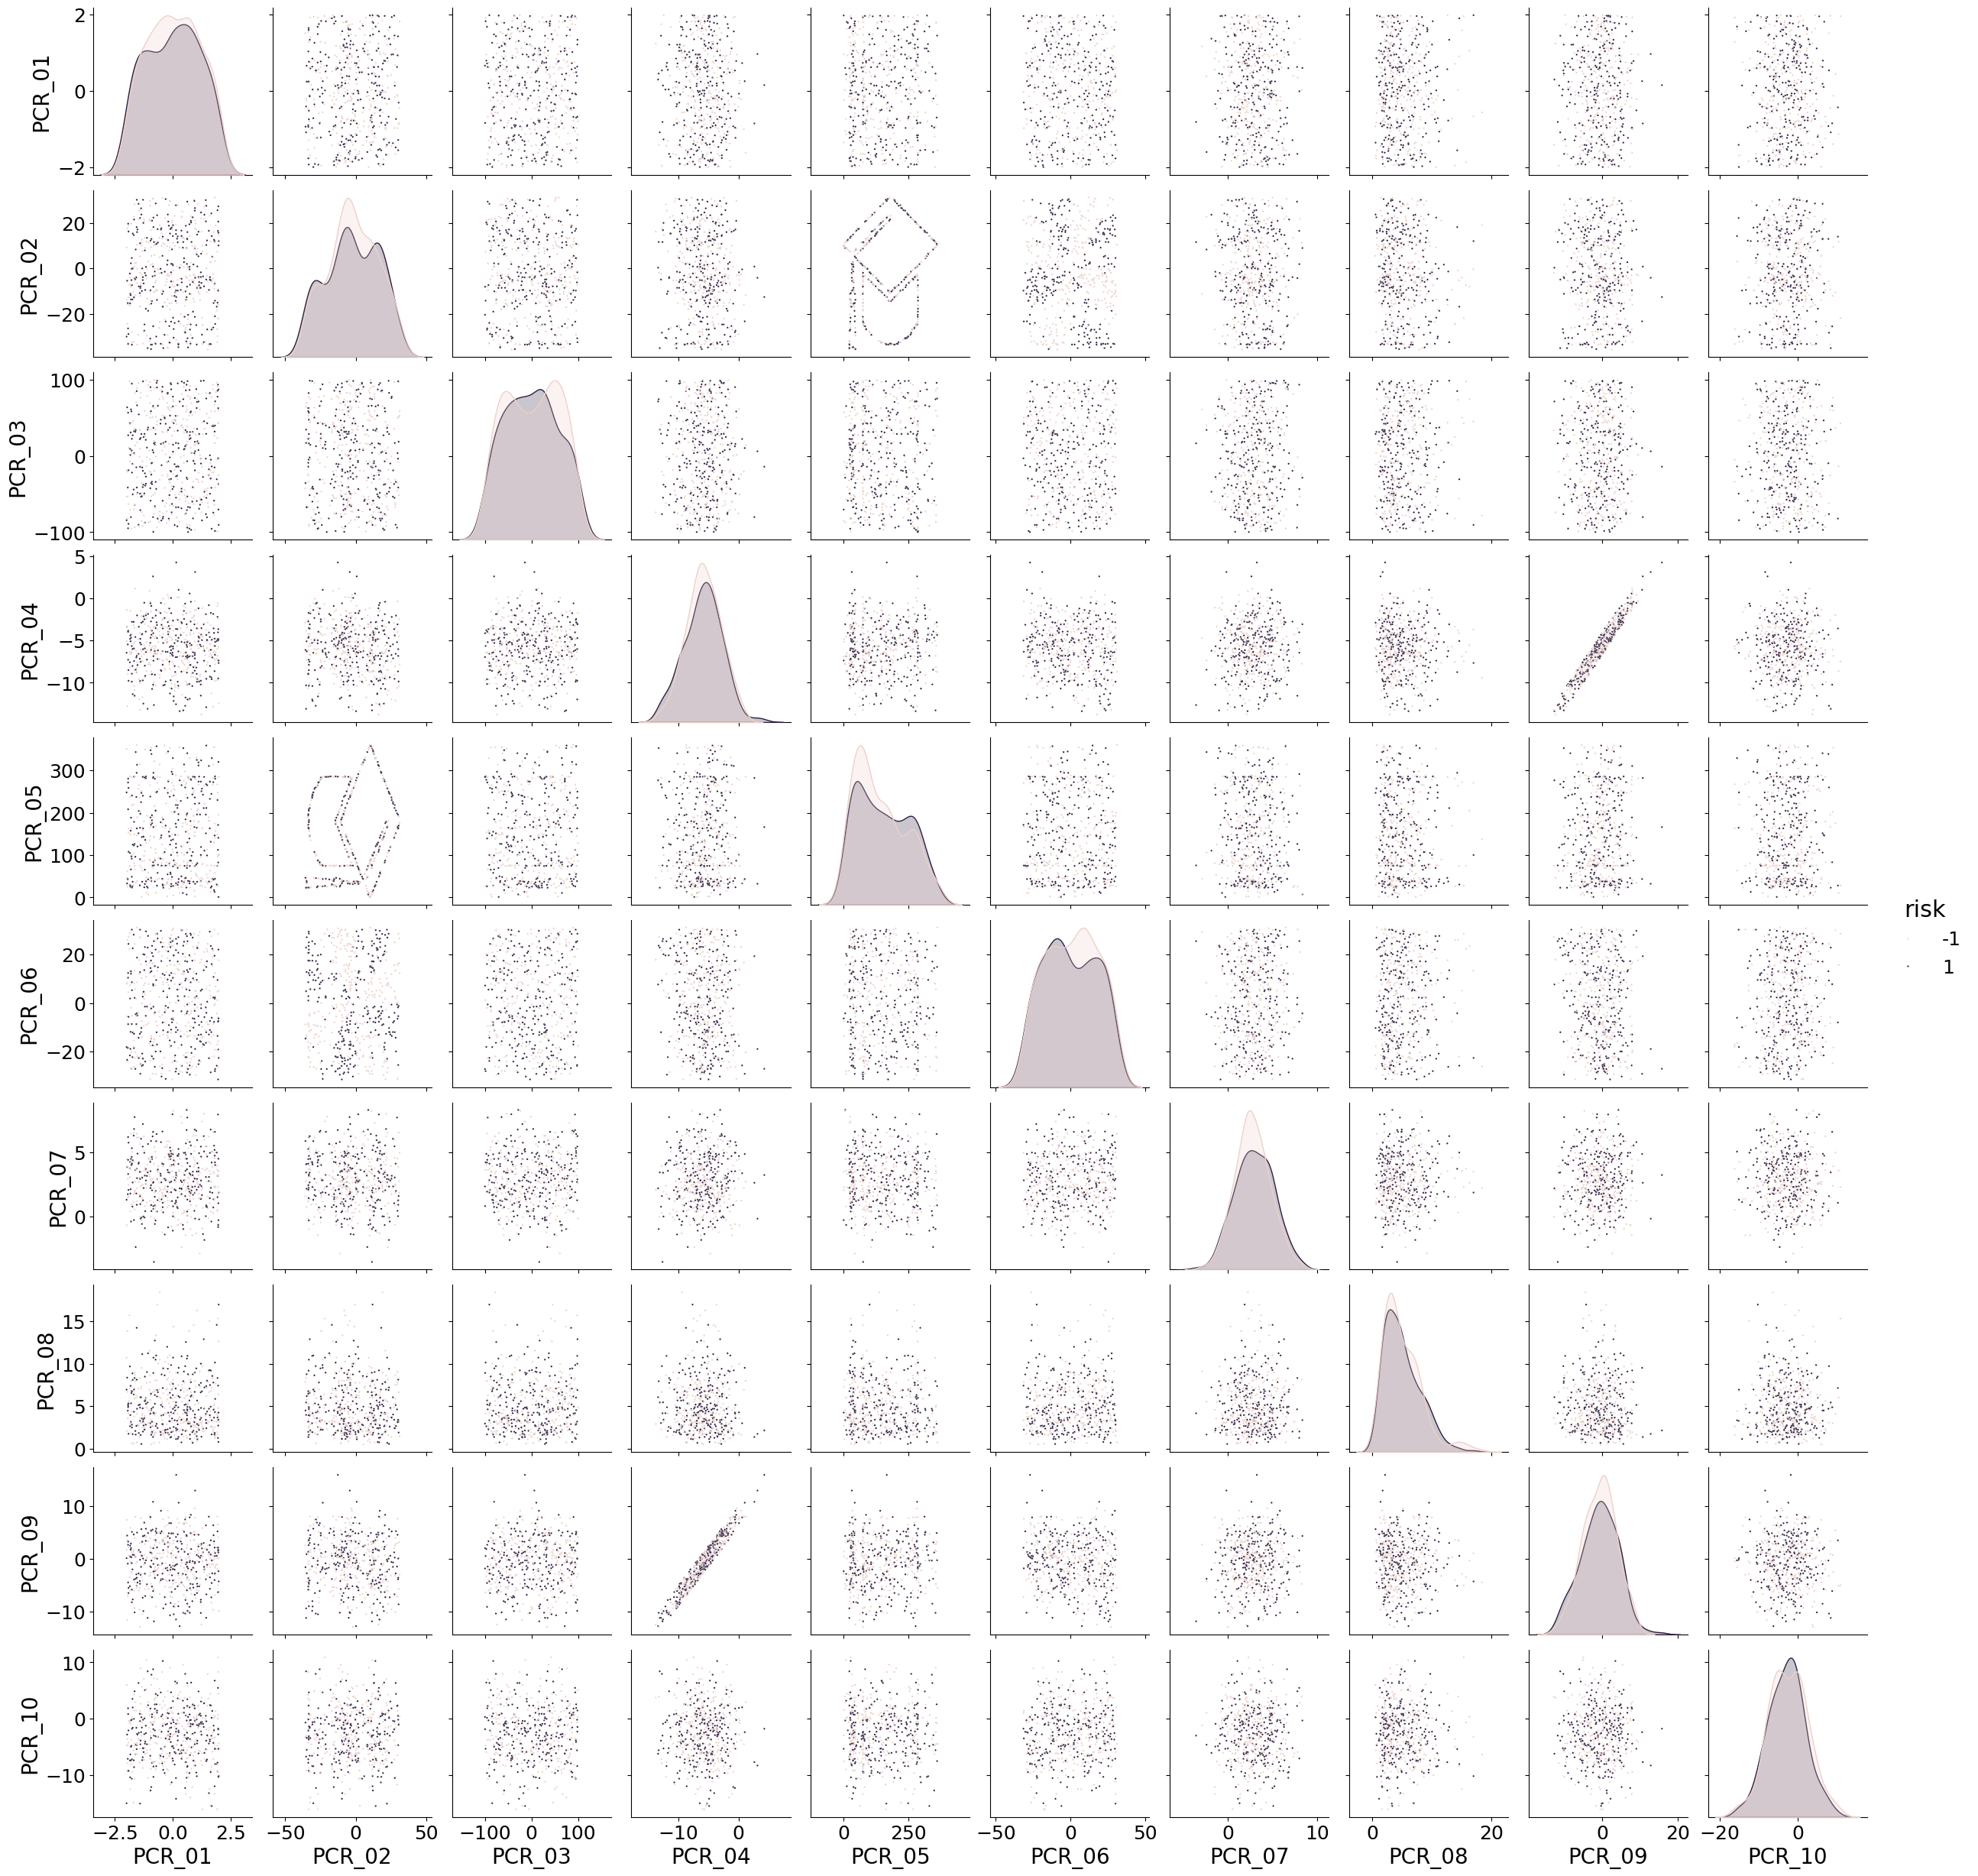

In [ ]:
sns.pairplot(false_virus_data[false_virus_data.filter(like='PCR').columns.tolist() + ["risk"]],
 plot_kws={"s": 3}, hue="risk")

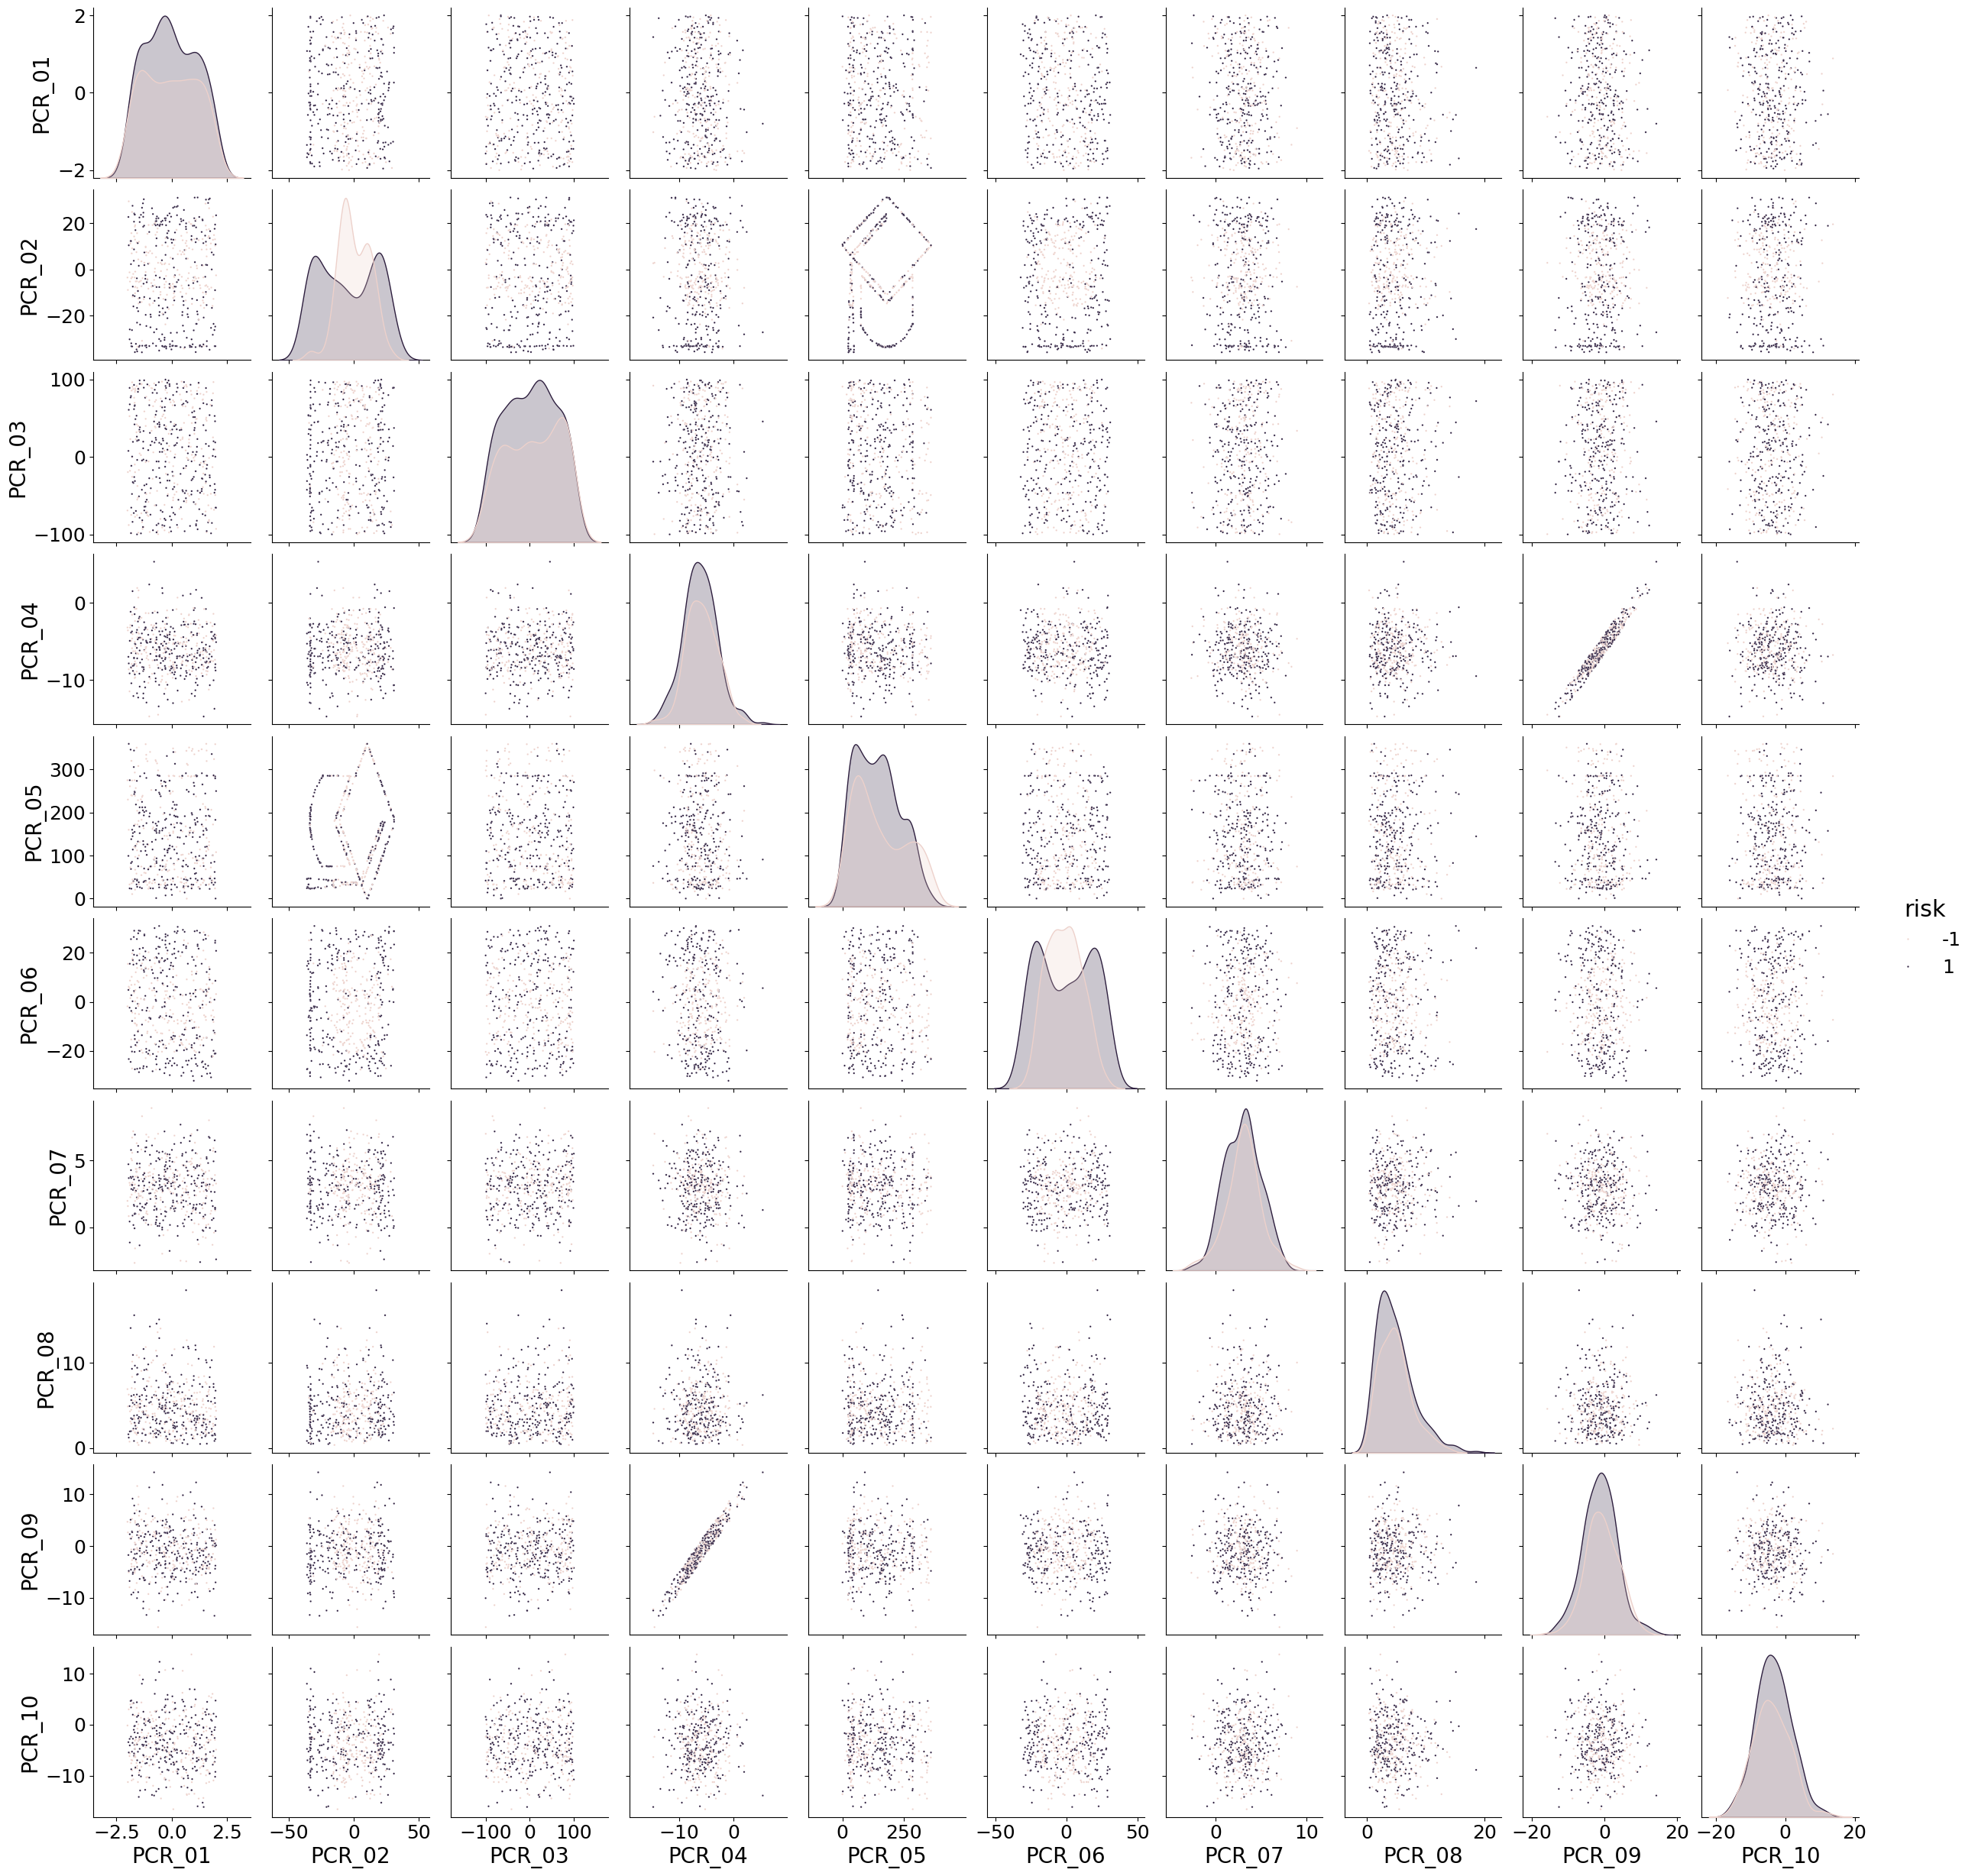

In [ ]:
sns.pairplot(true_virus_data[true_virus_data.filter(like='PCR').columns.tolist() + ["risk"]],
 plot_kws={"s": 3}, hue="risk")

Text(0.5, 0.98, 'PCR02 & PCR06 Risk Factor - SpecialProperty Group = True')

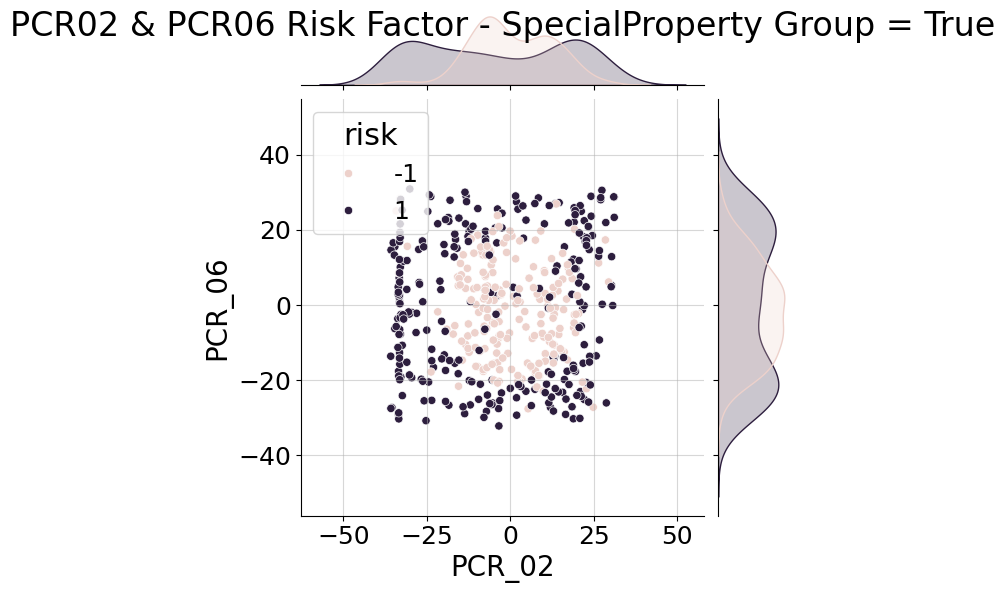

In [ ]:
g = sns.jointplot(data=true_virus_data, x="PCR_02", y="PCR_06", hue = "risk")
_ = g.ax_joint.grid(alpha=0.5)
g.fig.suptitle("PCR02 & PCR06 Risk Factor - SpecialProperty Group = True")

Text(0.5, 0.98, 'PCR02 & PCR06 Risk Factor - SpecialProperty Group = False')

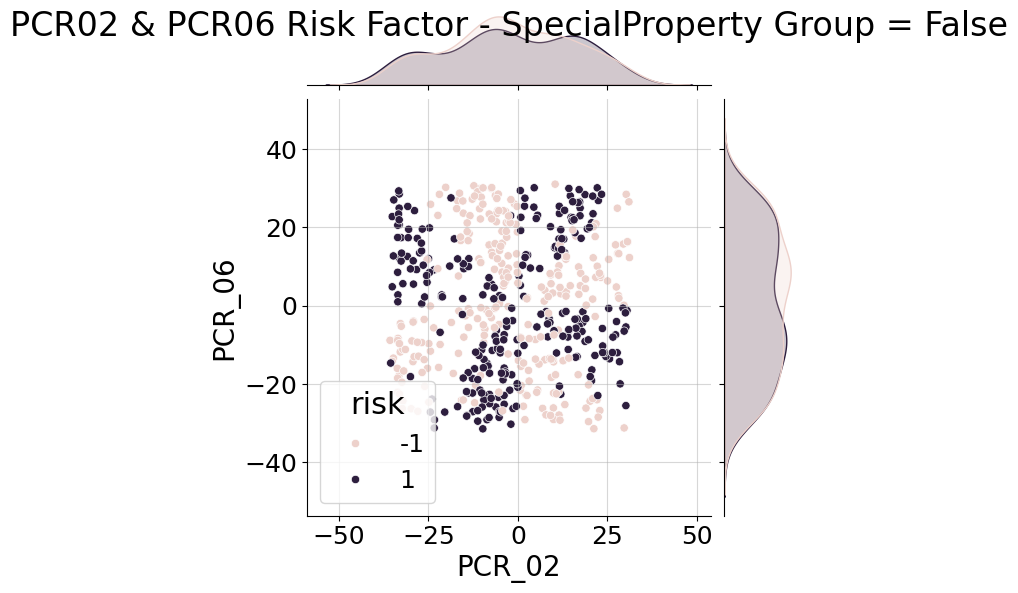

In [ ]:
g = sns.jointplot(data=false_virus_data, x="PCR_02", y="PCR_06", hue = "risk")
_ = g.ax_joint.grid(alpha=0.5)
g.fig.suptitle("PCR02 & PCR06 Risk Factor - SpecialProperty Group = False")

Text(0.5, 0.98, 'PCR02 & PCR06 Risk Factor - Both Groups')

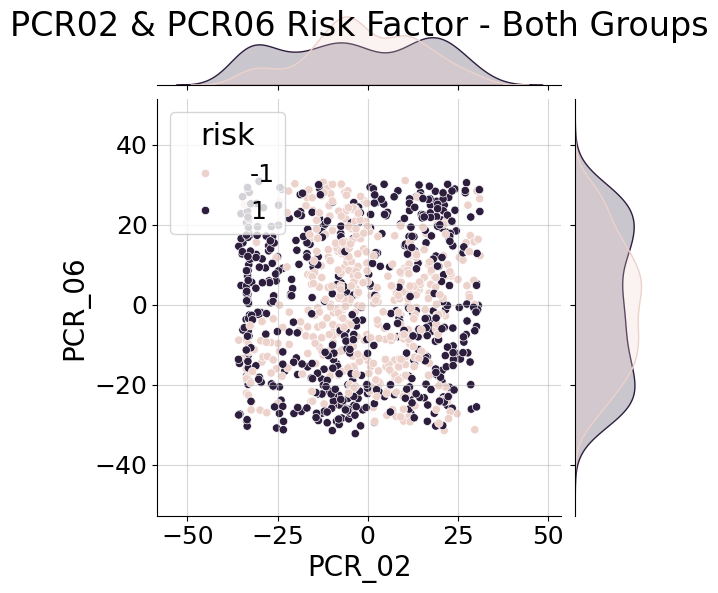

In [ ]:
g = sns.jointplot(data=virus_data_training, x="PCR_02", y="PCR_06", hue = "risk")
_ = g.ax_joint.grid(alpha=0.5)
g.fig.suptitle("PCR02 & PCR06 Risk Factor - Both Groups")

In [ ]:
def plot3d(df, colX, colY, colZ, title, hue=None, s=1):
  %matplotlib inline

  fig = plt.figure(figsize=(20, 4))
  axes = [fig.add_subplot(1, 4, 1, projection='3d'),
          fig.add_subplot(1, 4, 2, projection='3d'),
          fig.add_subplot(1, 4, 3, projection='3d'),
          fig.add_subplot(1, 4, 4, projection='3d')]

  palette = sns.color_palette("hls", 2)

  for i,ax in enumerate(axes):
    if hue is None:
      ax.scatter3D(df[colX], df[colY], df[colZ], color=palette[0], s=s)
    else:
      idx = df[hue] == True
      df1 = df[idx]
      df2 = df[~idx]

      ax.scatter3D(df1[colX], df1[colY], df1[colZ], color=palette[0], s=s)
      ax.scatter3D(df2[colX], df2[colY], df2[colZ], color=palette[1], s=s)

    if i == 3 or i == 1:
      ax.set_xlabel(colX, labelpad=20)
      ax.set_ylabel(colY, labelpad=20)
    else:
      ax.xaxis.set_ticklabels([])
      ax.yaxis.set_ticklabels([])

    ax.view_init(elev=5., azim=45*i+15)

  axes[1].set_zlabel("\n" + colZ, labelpad=1)

  plt.suptitle(title)
  plt.subplots_adjust(wspace=0.1, top=0.99)
  plt.show()

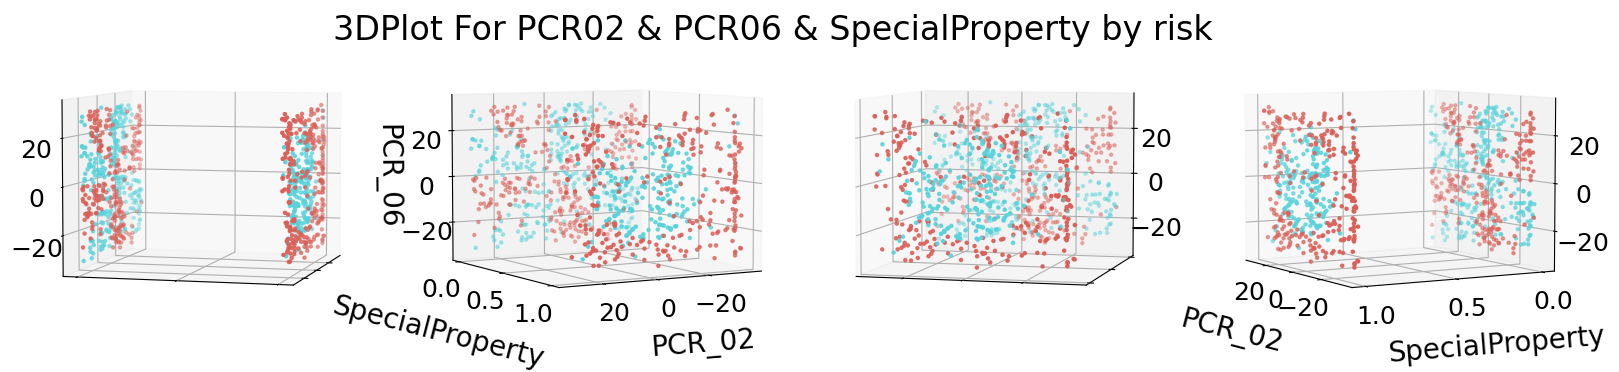

In [ ]:
plot3d(virus_data_training, "PCR_02", "SpecialProperty", "PCR_06", title="3DPlot For PCR02 & PCR06 & SpecialProperty by risk", hue="risk", s=5)

In [ ]:
def agePlot(virus_data_age, title_name):
  COL_NAME = ['age']
  COLS, ROWS = (2, len(COL_NAME))
  plt.figure(figsize=(5 * COLS, 4 * ROWS))
  for row in range(ROWS):
    column = COL_NAME[row]
    for j, cls in enumerate(["risk", "spread"]):
      plt.subplot(ROWS,COLS, row * COLS + 1 + j)

      isContinuous = "float" in virus_data_training[column].dtype.name
      sns.histplot(data=virus_data_age, x=column, hue=cls, line_kws={"linewidth": 3},
      kde=isContinuous, multiple="layer" if isContinuous else "dodge")
      plt.grid(alpha=0.5)
      plt.title(title_name)
  plt.tight_layout()

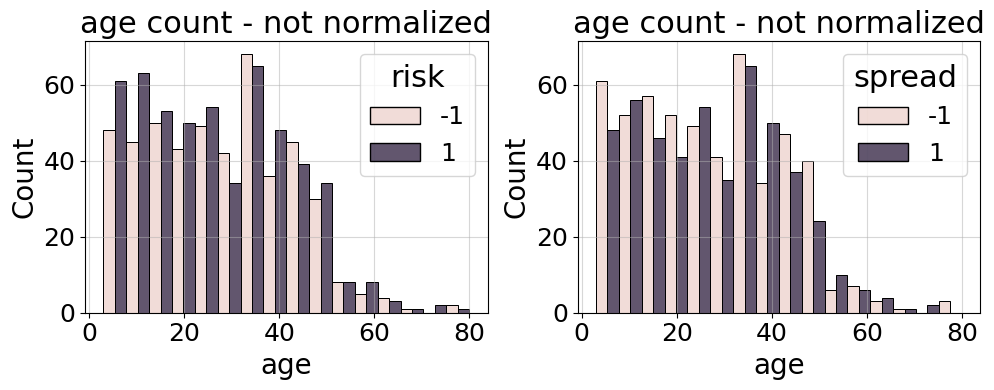

In [ ]:
agePlot(virus_data_training, "age count - not normalized")

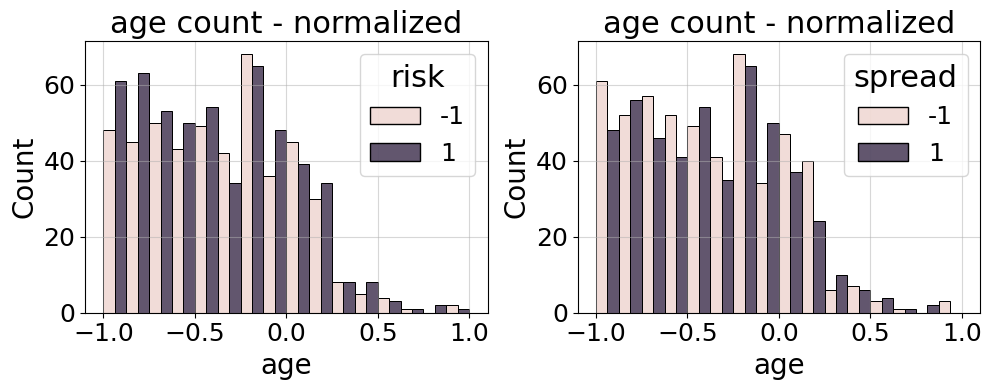

In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
virus_data_minmax = virus_data_training.copy()
virus_data_minmax['age'] = scaler.fit_transform(virus_data_minmax[['age']])



agePlot(virus_data_minmax, "age count - normalized")

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler(feature_range=(-1, 1))

min_max_array = ['patient_id', 'is_male', 'SpecialProperty','sore_throat','cough','shortness_of_breath','fever','smell_loss','age','num_of_siblings','happiness_score','conversations_per_day',
                 'sport_activity','x-location','PCR_01','PCR_02','PCR_03','PCR_05','PCR_06', 'num_pcr_date']
standard_array = ['weight','household_income','sugar_levels','y-location','PCR_04','PCR_07','PCR_08','PCR_09', 'PCR_10']
virus_data_norm = virus_data_training.copy()

for column in min_max_array:
  virus_data_norm[column] = scaler_minmax.fit_transform(virus_data_norm[[column]])

for column in standard_array:
  virus_data_norm[column] = scaler_standard.fit_transform(virus_data_norm[[column]])




In [ ]:
#prepare.py

def column_edit(data):
  data['SpecialProperty'] = data['blood_type'].isin(['O+', 'B+'])
  data['sore_throat'] = data['symptoms'].apply(lambda x: 'sore_throat' in x.split(';')  if pd.notna(x) else False)
  data['cough'] = data['symptoms'].apply(lambda x: 'cough' in x.split(';')  if pd.notna(x) else False)
  data['shortness_of_breath'] = data['symptoms'].apply(lambda x: 'shortness_of_breath' in x.split(';')  if pd.notna(x) else False)
  data['fever'] = data['symptoms'].apply(lambda x: 'fever' in x.split(';')  if pd.notna(x) else False)
  data['smell_loss'] = data['symptoms'].apply(lambda x: 'smell_loss' in x.split(';')  if pd.notna(x) else False)
  data['is_male'] = data['sex'].isin(['M'])
  data['x-location'] = data['current_location'].apply(lambda x: float(x.replace("(", "").replace(")", "").replace("'", "").split(", ")[0]))
  data['y-location'] = data['current_location'].apply(lambda x: float(x.replace("(", "").replace(")", "").replace("'", "").split(", ")[1]))
  data['num_pcr_date'] = data['pcr_date'].apply(lambda x: float(x.replace("-", "")))
  data.drop('blood_type', axis=1, inplace=True)
  data.drop('current_location', axis=1, inplace=True)
  data.drop('sex', axis=1, inplace=True)
  data.drop('symptoms', axis=1, inplace=True)
  data.drop('pcr_date', axis=1, inplace=True)

def prepare_data(training_data, new_data):
  new_data_prepare = new_data.copy()
  new_training_data = training_data.copy()
  column_edit(new_training_data)
  column_edit(new_data_prepare)

  scaler_standard = StandardScaler()
  scaler_minmax = MinMaxScaler(feature_range=(-1, 1))

  min_max_array = ['patient_id', 'is_male', 'SpecialProperty','sore_throat','cough','shortness_of_breath','fever','smell_loss','age','num_of_siblings','happiness_score','conversations_per_day',
                 'sport_activity','x-location','PCR_01','PCR_02','PCR_03','PCR_05','PCR_06', 'num_pcr_date']
  standard_array = ['weight','household_income','sugar_levels','y-location','PCR_04','PCR_07','PCR_08','PCR_09', 'PCR_10']

  for column in min_max_array:
    scaler_minmax.fit(new_training_data[[column]])
    new_data_prepare[column] = scaler_minmax.transform(new_data_prepare[[column]])


  for column in standard_array:
    scaler_standard.fit(new_training_data[[column]])
    new_data_prepare[column] = scaler_standard.transform(new_data_prepare[[column]])

  return new_data_prepare








In [ ]:
# Prepare training set according to itself
virus_data_training_prepared = prepare_data(virus_data_train, virus_data_train)
# Prepare test set according to the raw training set
virus_data_test_prepared = prepare_data(virus_data_train, virus_data_test)




In [ ]:
csv_file_path = 'output.csv'
virus_data_train.to_csv(csv_file_path, index=False)
csv_file_path = 'output.csv'
virus_data_train.to_csv(csv_file_path, index=False)